In [24]:
import os
import sys
import time
import pdb
import cPickle as pickle
import numpy

import theano
import theano.tensor as T
from theano.tensor.shared_randomstreams import RandomStreams

from logistic_sgd import load_data
from utils import tile_raster_images

try:
    import PIL.Image as Image
except ImportError:
    import Image

from dA import *
from mlp import *
from semantic_dA import *

##Loading MNIST data

In [10]:
#load data                                                                                                                                                       
dataset='mnist.pkl.gz'
testx, testy = load_data(dataset)[2]

 ... loading data


##paths and parameters for loading models

In [11]:
waists = [10,25,50,100] #nhidden parameters, which index the model files' paths.
path_MLP = '../data/MLP_params.p'
path_l2_prefix = '../data/dA_l2/dA_l2_nhid'
path_l2_suffix = '.p'
path_sda_prefix = '../data/sdA_l2init/retry_sDA_l2init_elaborate_nhid'
path_sda_suffix = '.p'

x = T.matrix('x')
rng = numpy.random.RandomState(1234)
theano_rng = RandomStreams(rng.randint(2 ** 30))

##Load models and test each one

In [22]:
das = {}
sdas = {}
for waist in waists:
    das[waist] = semantic_dA(
                rng=rng,
                theano_rng=theano_rng,
                input=x,
                n_in=28 * 28,
                n_hidden=waist,
                n_out=10,
                f_load_MLP = open(path_MLP,'r'),
                f_load_DA = open(path_l2_prefix+str(waist)+path_l2_suffix,'r')
        )
    sdas[waist] = semantic_dA(
                rng=rng,
                theano_rng=theano_rng,
                input=x,
                n_in=28 * 28,
                n_hidden=waist,
                n_out=10,
                f_load_MLP = open(path_MLP,'r'),
                f_load_DA = open(path_sda_prefix+str(waist)+path_sda_suffix,'r')
        )
    print 'Waist ', waist, ' nofinetune/finetune error rate: ', \
            das[waist].mlp.errors(testy).eval({das[waist].x:testx.get_value()}), \
            sdas[waist].mlp.errors(testy).eval({sdas[waist].x:testx.get_value()})

Waist  10  nofinetune/finetune error rate:  0.2694 0.0846
Waist  25  nofinetune/finetune error rate:  0.0853 0.0635
Waist  50  nofinetune/finetune error rate:  0.0396 0.0379
Waist  100  nofinetune/finetune error rate:  0.0279 0.0261


##Pictures for confirmation

Waist  10
nofinetune:


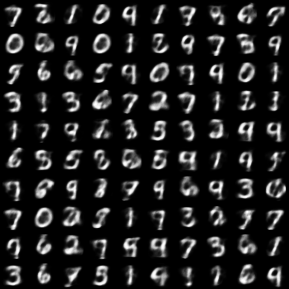

finetune:


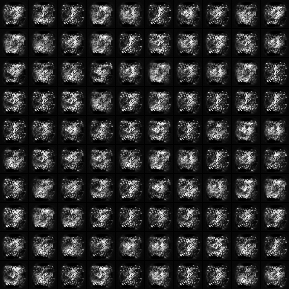

Waist  25
nofinetune:


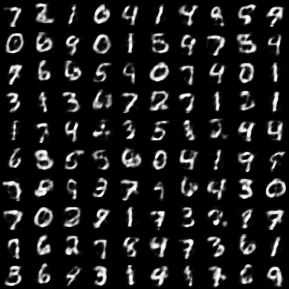

finetune:


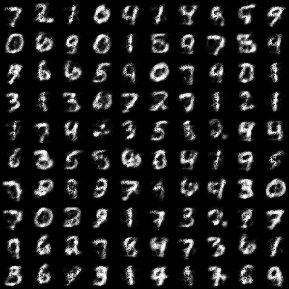

Waist  50
nofinetune:


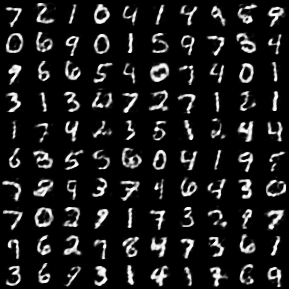

finetune:


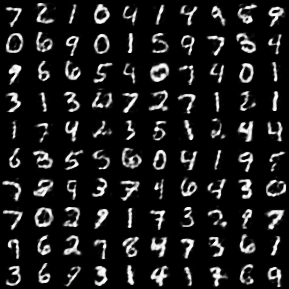

Waist  100
nofinetune:


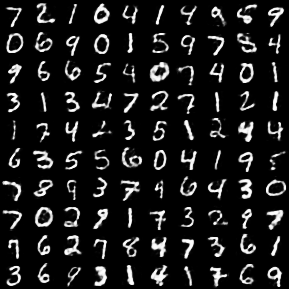

finetune:


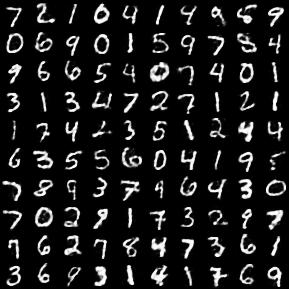

In [33]:
import IPython.display as I
for waist in waists:
    da_img = das[waist].output.eval({das[waist].x:testx.get_value()})
    sda_img = sdas[waist].output.eval({sdas[waist].x:testx.get_value()})
    
    print 'Waist ', waist
    print 'nofinetune:'
    img = Image.fromarray(tile_raster_images(X=da_img,
                                               img_shape=(28, 28), 
                                               tile_shape=(10, 10),
                                               tile_spacing=(1, 1)))
    
    img.save('temp.png')
    I.display(I.Image('temp.png'))
    
    print 'finetune:'
    img = Image.fromarray(tile_raster_images(X=sda_img,
                                               img_shape=(28, 28), 
                                               tile_shape=(10, 10),
                                               tile_spacing=(1, 1)))
    img.save('temp.png')
    I.display(I.Image('temp.png'))
    